# Import Libraries

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.over_sampling import SMOTE,SMOTENC
from tqdm import tqdm
from dataclasses import dataclass
from collections import Counter

# Importing the ML algorithms
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense



# Import Original Dataset

In [2]:
# Data Reading
Original_df=pd.read_csv("diabetic_data_uci.csv")

In [3]:
Copy_df = Original_df.copy()

In [4]:
Copy_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Code block to analyze the improtance of features
print(Copy_df.describe())

#Printing the data types and missing values
print(Copy_df.info())

#Getting the unique values for each column
print("\nUnique Values in Each Column:")
for col in Copy_df.columns:
    print(f"\nColumn: {col}")
    print(Copy_df[col].value_counts())

       encounter_id   patient_nbr  admission_type_id  \
count  9.456400e+04  9.456400e+04       94564.000000   
mean   1.475339e+08  5.152131e+07           2.050865   
std    8.289753e+07  3.669269e+07           1.464545   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.076686e+07  2.321308e+07           1.000000   
50%    1.454069e+08  4.375550e+07           1.000000   
75%    2.044408e+08  8.585396e+07           3.000000   
max    3.496593e+08  1.894451e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              94564.000000         94564.000000      94564.000000   
mean                   3.773074             5.776723          4.413794   
std                    5.360602             4.131408          2.996457   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000




1.   **Gender has Unknown/Invalid values as per our summary**
2.   **Missing values have been represented with ? which needs to be processed**


In [6]:
Copy_df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

# Exploratory Data Analysis


In [7]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Univariate Analysis


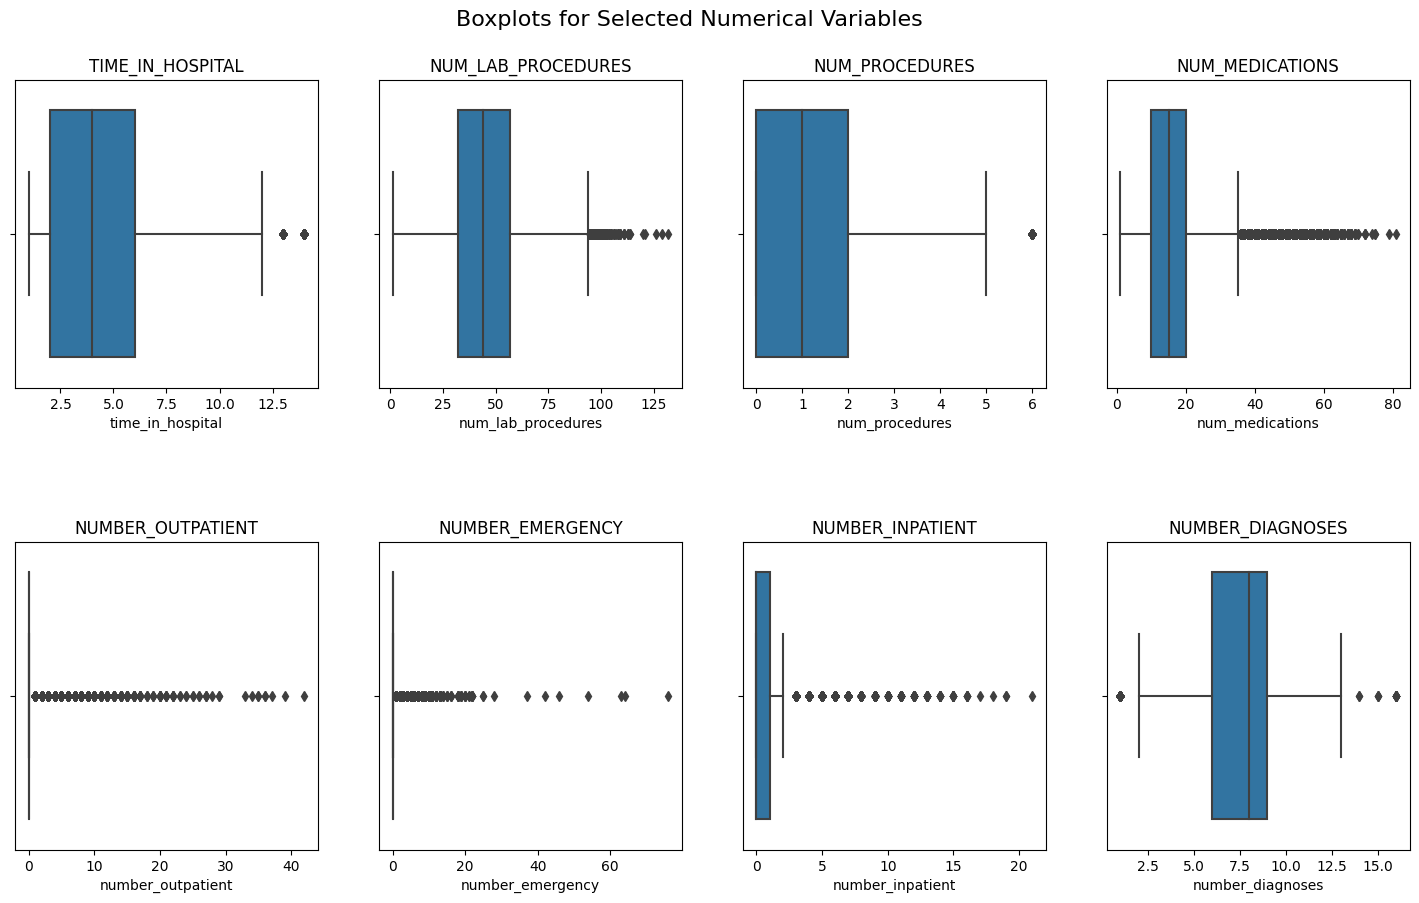

In [8]:
# Subsetting a different set of numerical columns for analysis
selected_numeric_features = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]
df_selected_numeric = Copy_df[selected_numeric_features]

# Generating Box plots to explore the distribution of selected numerical variables
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots for Selected Numerical Variables", fontsize=16, y=0.95)

# Loop through the selected columns and create individual boxplots
for idx, column in enumerate(df_selected_numeric.columns):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, idx + 1)
    # Create a boxplot for the current variable
    sns.boxplot(x=df_selected_numeric[column], ax=ax)
    # Set the title for the subplot
    ax.set_title(column.upper())

# Display the plots
plt.show()


* there are outlier present in all the numerical variables
* number_outpatient, numer_emergency, and number_inpatient are very skewed , with most of the values being zero


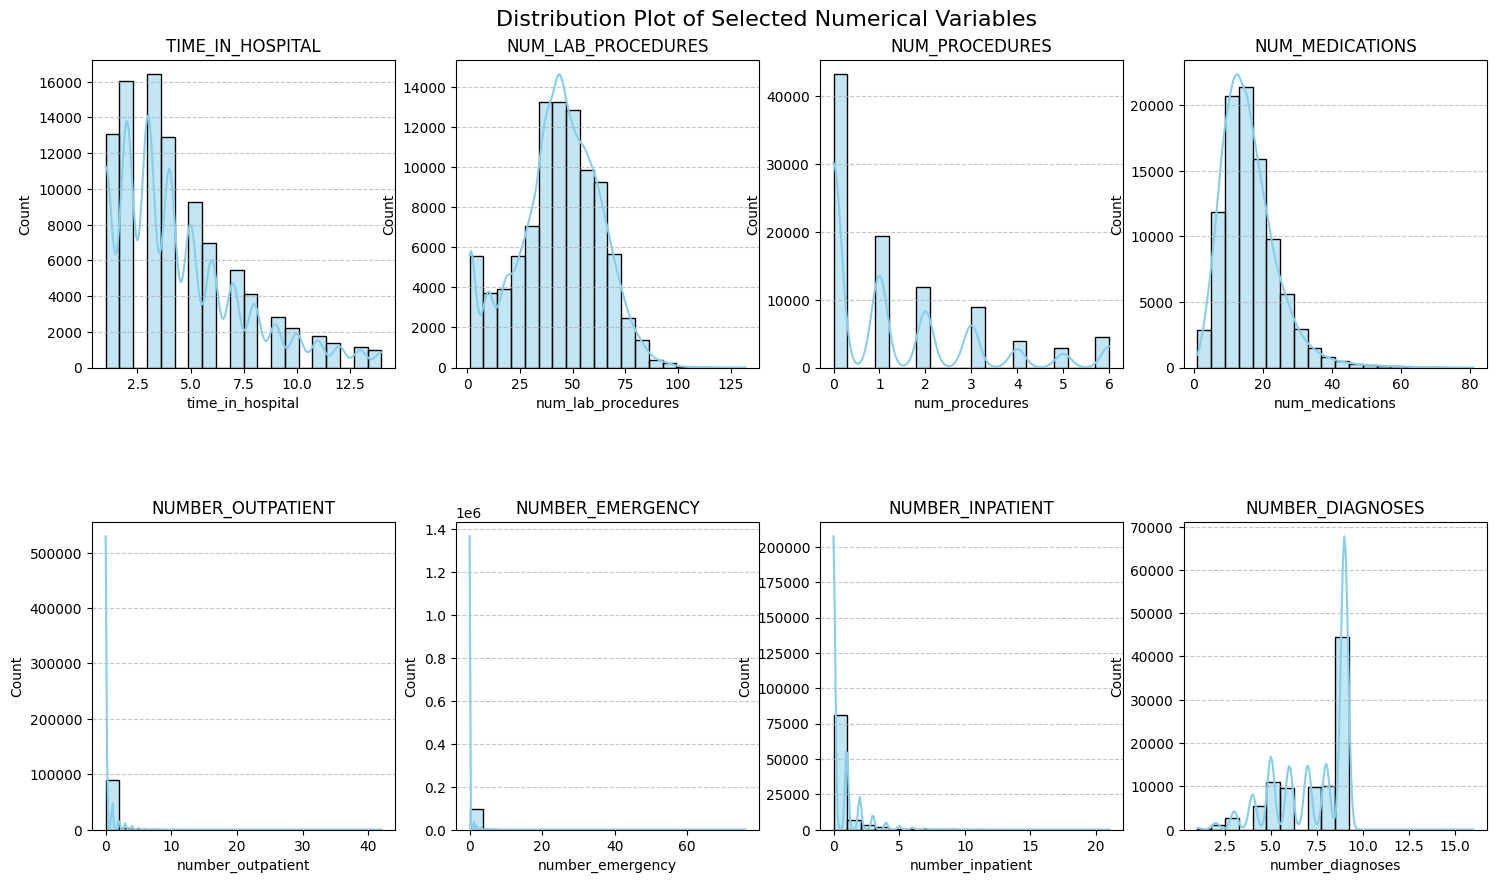

In [9]:
# Generating distribution plots to explore the distribution of selected numerical variables
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution Plot of Selected Numerical Variables", fontsize=16, y=0.93)

# Loop through the selected columns and create individual distribution plots
for idx, column in enumerate(df_selected_numeric.columns):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, idx + 1)
    # Create a distribution plot for the current variable
    sns.histplot(df_selected_numeric[column], kde=True, ax=ax, bins=20, color='skyblue')
    # Set the title for the subplot
    ax.set_title(column.upper())
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plots
plt.show()


* num_medications and time_in_hospital are slightly right skewed
* As observed in the boxplots number_outpatient and number_emergency are heavily skewed with many variables being zero

## Generating visualizations for categorical columns

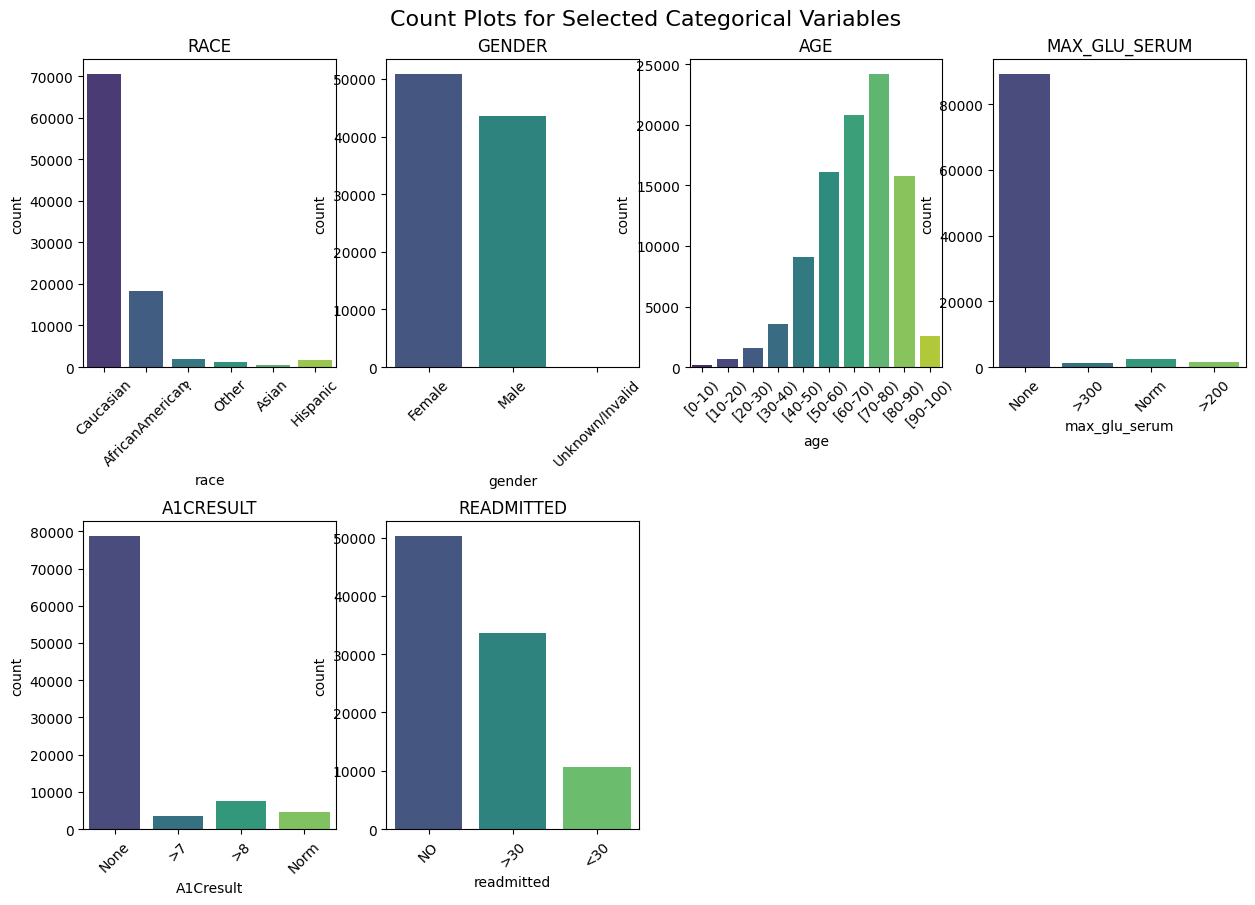

In [10]:
# Subsetting a different set of categorical columns for analysis
selected_categorical_features = ["race", "gender", "age", "max_glu_serum", "A1Cresult", "readmitted"]
df_selected_categorical = Copy_df[selected_categorical_features]

# Generating count plots to explore the distribution of selected categorical variables
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Count Plots for Selected Categorical Variables", fontsize=16, y=0.93)

# Loop through the selected columns and create individual count plots
for idx, column in enumerate(df_selected_categorical.columns):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, idx + 1)
    # Create a count plot for the current categorical variable
    sns.countplot(data=df_selected_categorical, x=column, ax=ax, palette='viridis')
    # Set the title for the subplot
    ax.set_title(column.upper())
    # Add rotation for better readability of x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Display the plots
plt.show()




*  Majority of patients are Caucasian by race
*  Number of female patients are slightly higher than number of male patients
* More patients are of age 75
* Higher number of female patients are readmitted as compared to male patients






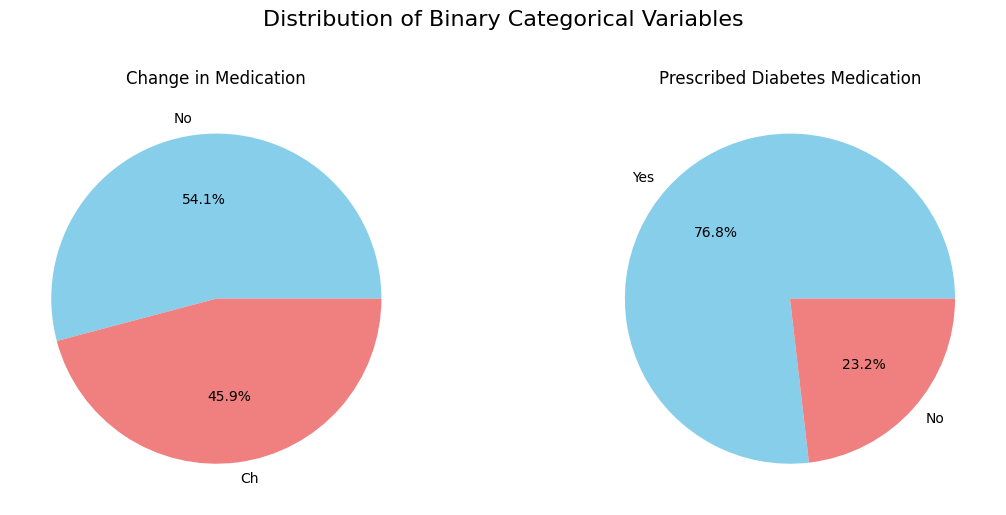

In [11]:
# Subsetting the binary categorical columns for analysis
binary_categorical_features = ["change", "diabetesMed"]
df_binary_categorical = Copy_df[binary_categorical_features]

# Set up a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.suptitle("Distribution of Binary Categorical Variables", fontsize=16, y=1.02)

# Pie chart for "change"
ax1 = axes[0]
change_counts = df_binary_categorical['change'].value_counts()
ax1.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax1.set_title("Change in Medication")

# Pie chart for "diabetesMed"
ax2 = axes[1]
diabetesMed_counts = df_binary_categorical['diabetesMed'].value_counts()
ax2.pie(diabetesMed_counts, labels=diabetesMed_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title("Prescribed Diabetes Medication")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


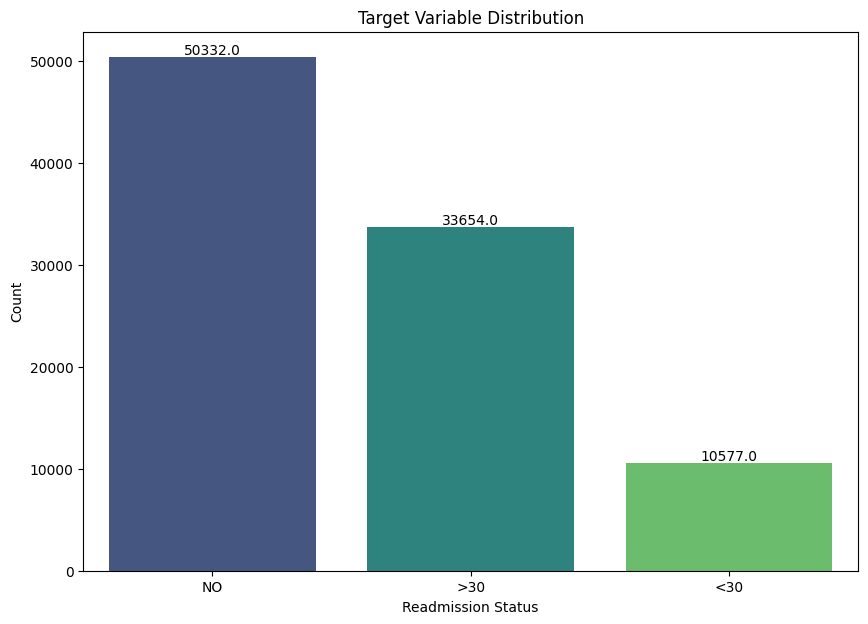

In [12]:
plt.figure(figsize=(10, 7))

# Using countplot for better representation of categorical data
ax = sns.countplot(x='readmitted', data=df_selected_categorical, palette='viridis')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Target Variable Distribution')
plt.xlabel('Readmission Status')
plt.ylabel('Count')

# Show the plot
plt.show()


##Bivariate Plots


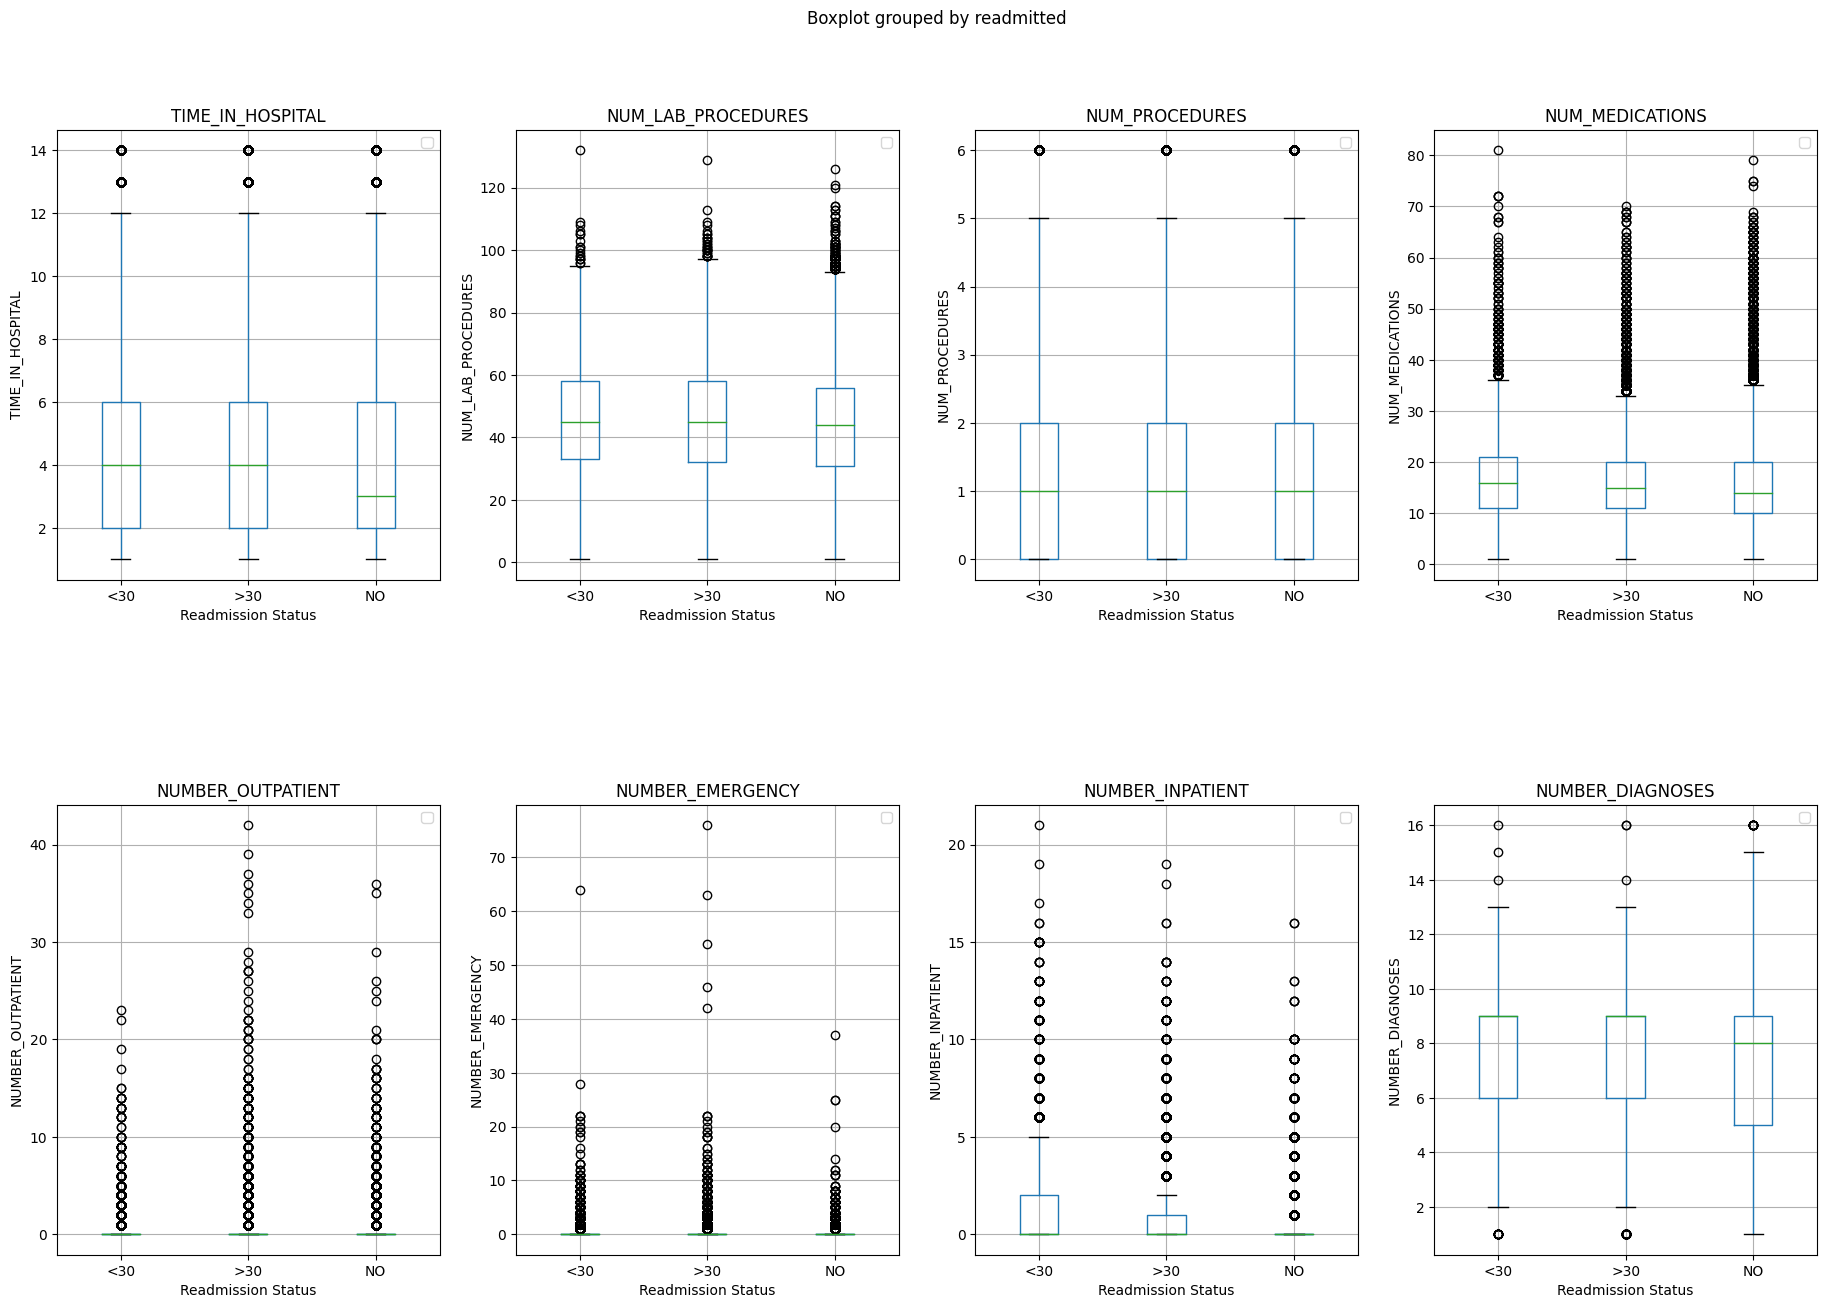

In [13]:
df_box1 = Copy_df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses","readmitted"]]

# Set the figure size
plt.figure(figsize=(22, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Bar Plots for Categorical Variables", fontsize=18, y=0.93)

# Loop through the column names and track the axes
for n, col_name in enumerate(df_box1.columns[:-1]):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)
    df_box1.boxplot(column='{}'.format(col_name), by='readmitted', ax=ax)
    ax.set_title(col_name.upper())
    ax.set_xlabel('Readmission Status')  # Add x-axis label
    ax.set_ylabel(col_name.upper())  # Add y-axis label

    # Add legend if needed
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

# Show the plots
plt.show()


* The variables num_lab_procedures and num_procedures do not appear to have a substantial variation between the distributions according to the target class.
* The variables number_emergency and number_outpatient appear to be highly skewed and have a considerable number of outliers.
* The variables number_medications, number_inpatient, and number_diagnoses have differences between the classes of the targeted variables.


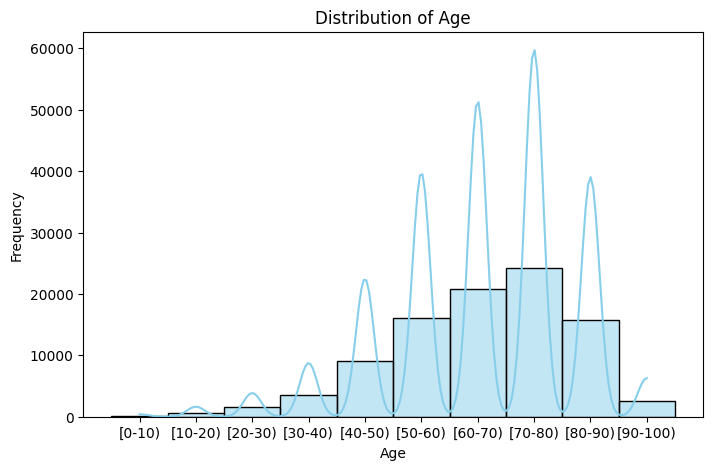

In [14]:
# Kernel Density Plot for the Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(Copy_df['age'], kde=True, color='skyblue', bins=15)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [15]:
# # Violin Plot for Number of Lab Procedures by Gender:

# plt.figure(figsize=(10, 6))
# sns.violinplot(x='gender', y='num_lab_procedures', data=Copy_df, palette='Pastel1')
# plt.title('Number of Lab Procedures by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Number of Lab Procedures')
# plt.show()


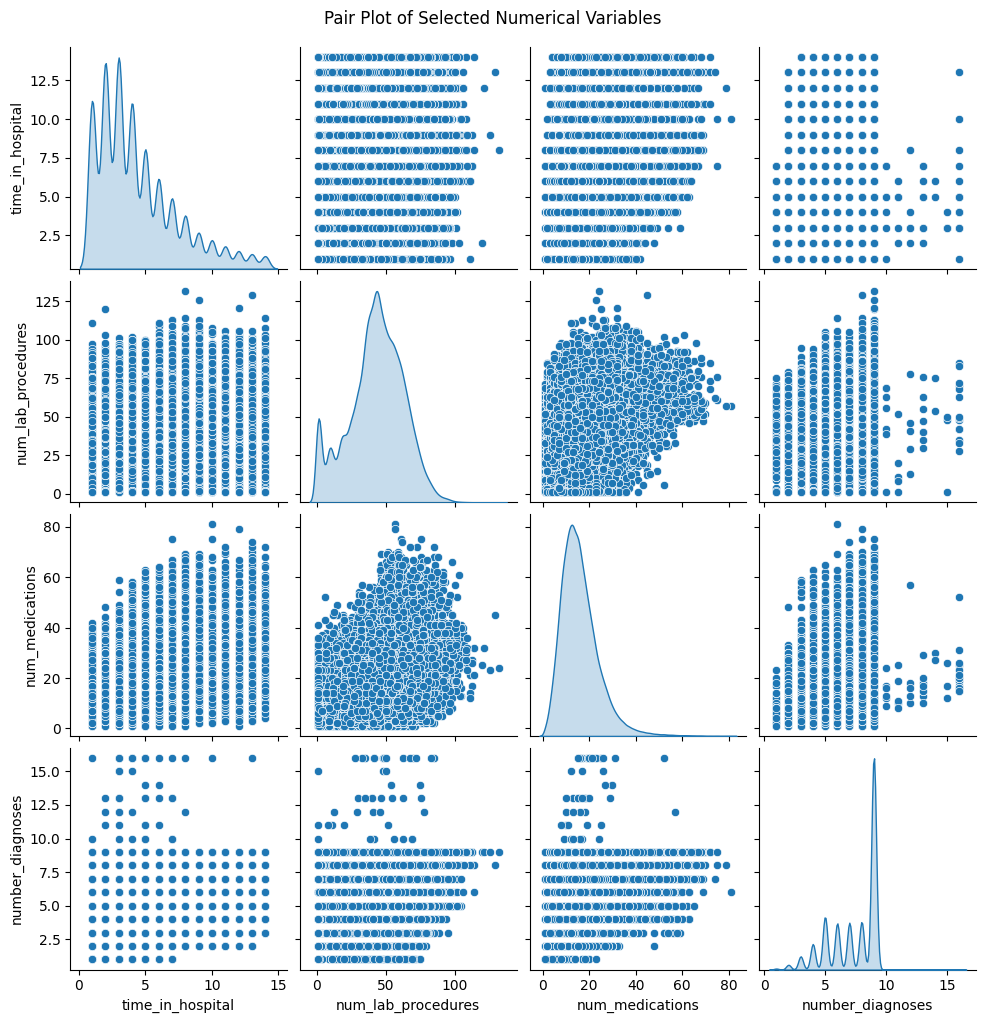

In [16]:
# Pair Plot for Selected Numerical Variables:

selected_numerical_features = ["time_in_hospital", "num_lab_procedures", "num_medications", "number_diagnoses"]
sns.pairplot(Copy_df[selected_numerical_features], diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()


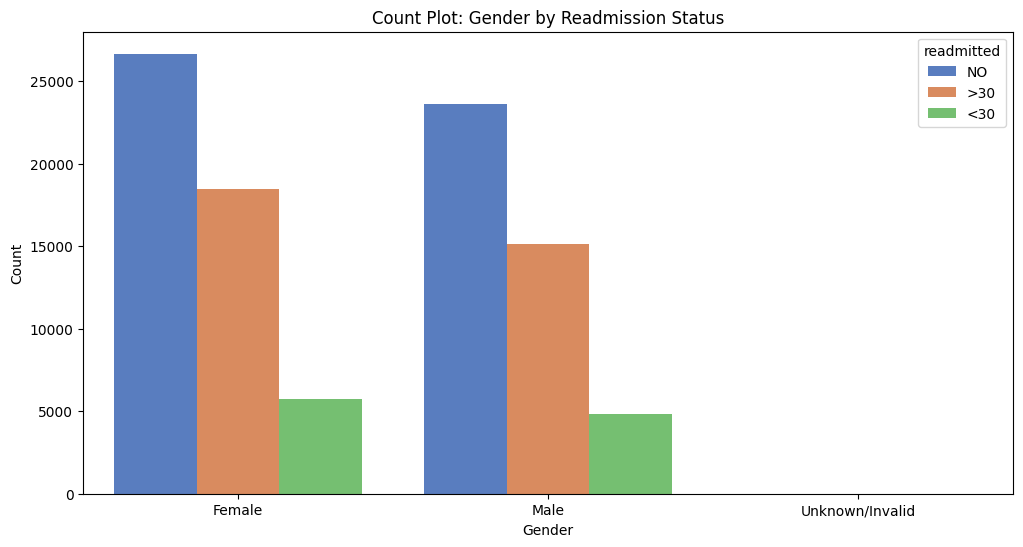

In [17]:
# Categorical Plots for Gender and Readmission Status:

plt.figure(figsize=(12, 6))
sns.countplot(data=Copy_df, x='gender', hue='readmitted', palette='muted')
plt.title('Count Plot: Gender by Readmission Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


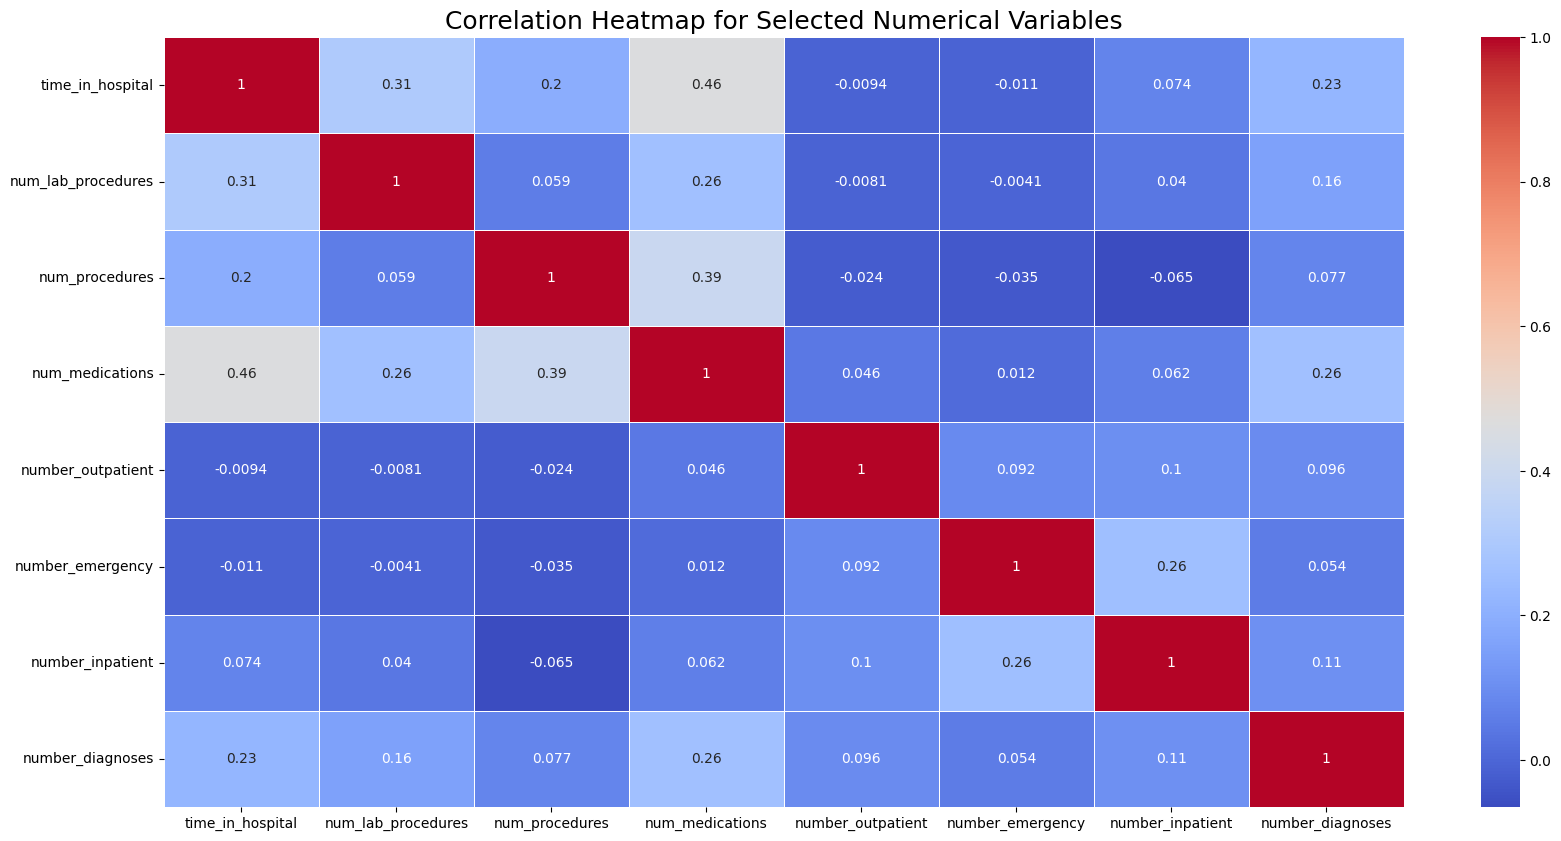

In [18]:
plt.figure(figsize=(20, 10))

# Create a heatmap for the correlation matrix of selected numerical variables
heatmap_data = df_selected_numeric.corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Numerical Variables', fontsize = 18)

#plt.savefig('Correlation_Heatmap.png', transparent=False)
plt.show()


* The most significant connection is between the number of medications and the length of stay in the hospital, however it is only 0.47 and not a reliable indicative of a linear relationship.

In [19]:
# Grouping and renaming columns
readmission_counts = Copy_df.groupby(['age', 'readmitted'])['encounter_id'].count().reset_index()
readmission_counts = readmission_counts.rename(columns={'encounter_id': 'Count'})

# Creating the bar chart
fig = px.bar(readmission_counts, x="age", y="Count", color="readmitted",
             title="Readmission Distribution according to Age",
             labels={'readmitted': 'Readmission Status', 'Count': 'Count'},
             color_discrete_map={'<30': 'red', '>30': 'green', 'NO': 'blue'})

# Show the plot
fig.show()
#fig.write_image("dist_race.png")


In [20]:
# Grouping and renaming columns
readmission_counts = Copy_df.groupby(['race', 'readmitted'])['encounter_id'].count().reset_index()
readmission_counts = readmission_counts.rename(columns={'encounter_id': 'Count'})

# Creating the bar chart
fig = px.bar(readmission_counts, x="race", y="Count", color="readmitted",
             title="Readmission Distribution according to Race",
             labels={'readmitted': 'Readmission Status', 'Count': 'Count'},
             color_discrete_map={'<30': 'red', '>30': 'green', 'NO': 'blue'})

# Show the plot
fig.show()
#fig.write_image("dist_race.png")


In [21]:
# Grouping and renaming columns
readmission_counts = Copy_df.groupby(['gender', 'readmitted'])['encounter_id'].count().reset_index()
readmission_counts = readmission_counts.rename(columns={'encounter_id': 'Count'})

# Creating the bar chart
fig = px.bar(readmission_counts, x="gender", y="Count", color="readmitted",
             title="Readmission Distribution according to Gender",
             labels={'readmitted': 'Readmission Status', 'Count': 'Count'},
             color_discrete_map={'<30': 'red', '>30': 'green', 'NO': 'blue'})

# Show the plot
fig.show()
#fig.write_image("dist_race.png")


In [22]:
#correlation matrix of selected numerical variables
corr_matrix = np.corrcoef(df_selected_numeric, rowvar=False)
fig = px.imshow(corr_matrix, labels=dict(x='Selected Numerical Variables', y='Selected Numerical Variables'), x=df_selected_numeric.columns, y=df_selected_numeric.columns, title='Correlation Heatmap')
fig.show()


In [23]:
#Distribution of Admission Types by admission_id

fig = px.pie(Copy_df, names='admission_type_id', title='Distribution of Admission Types')
fig.show()


# Feture Engineering



*   **The categorical values will have to be encoded for the model**
*   **Handling the null values by coverting them to NaN and then checking columns for more than required (30%) null values**



In [24]:
# replacing ? and invalid values with with Nan
Copy_df = Copy_df.replace(["?", "Unknown/Invalid"], np.nan)
# Checking for % of null values
(Copy_df.isna().sum()*100/len(Copy_df))[(Copy_df.isna().sum()*100/len(Copy_df))>30]

weight               96.851868
payer_code           41.520029
medical_specialty    47.625946
dtype: float64

**Dropping the columns Weight, Payer_Code and Medical_Speciality**



In [25]:
Copy_df=Copy_df.drop(['weight','payer_code','medical_specialty'],axis=1)

**Checking the percentage of null values**

In [26]:
null_percentage = (Copy_df.isna().sum() * 100 / len(Copy_df))
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

race                        2.173131
gender                      0.003172
num_lab_procedures          0.001057
num_procedures              0.001057
num_medications             0.001057
number_outpatient           0.001057
number_emergency            0.001057
number_inpatient            0.001057
diag_1                      0.022207
diag_2                      0.371177
diag_3                      1.472019
number_diagnoses            0.001057
max_glu_serum               0.001057
A1Cresult                   0.001057
metformin                   0.001057
repaglinide                 0.001057
nateglinide                 0.001057
chlorpropamide              0.001057
glimepiride                 0.001057
acetohexamide               0.001057
glipizide                   0.001057
glyburide                   0.001057
tolbutamide                 0.001057
pioglitazone                0.001057
rosiglitazone               0.001057
acarbose                    0.001057
miglitol                    0.001057
t


*   All the columns do not have more than 3% missing values
*   There are only two options either imputing them or dropping them. Imputing however is not recommended in the healthcare setting. thus if the percentage of loss of dropping is less, we can decide to drop them
*   For, this we have to find the % loss for rows to see the impact of dropping them








In [27]:
(Copy_df.shape[0]-Copy_df.dropna(axis=0).shape[0])*100/Copy_df.dropna(axis=0).shape[0]

3.8035543749108114

**Since the loss is just 3% we can proceed with dropping these rows without losing too much information**

In [28]:
Copy_df.dropna(axis=0,inplace=True)

In [29]:
Copy_df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

**Now there are no missing values in the dataset**

In [30]:
# Checking the distribution of the categorical variables 'examide' and 'citoglipton'
print(Copy_df['examide'].value_counts())
print(Copy_df['citoglipton'].value_counts())

# Since within the boundaries of our dataset both 'examide' and 'citoglipton' have only one category we will be dropping these columns as they don't add much value for prediction
Copy_df = Copy_df.drop(columns=['examide', 'citoglipton'])

No    91099
Name: examide, dtype: int64
No    91099
Name: citoglipton, dtype: int64


In [31]:
# Printing the df to verify
Copy_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31.0,6.0,16.0,0.0,0.0,0.0,414,411,250,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


Now we have the basic processed data to use for our model

In [32]:
Copy_df.to_csv('clean_data.csv', index=False)
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Coming to the data dictionary,**
*   **The categories within 'admission type', 'discharge disposition', and 'admission source' are similar, so by merging these categories, we can decrease the number of columns created during the encoding process.**
*   **For the 'admission_type' column, similar categories are remapped as follows: 'Urgent' (2) and 'Trauma Center' (7) are combined into the 'Emergency' (1) category. Additionally, 'NULL' (6) and 'Not Mapped' (8) are consolidated into the 'Not Available' (5) category.**
*   **For the 'discharge_disposition' column, similar categories are remapped: e.g. 'Discharged/transferred to home with home health service' (6), 'Discharged/transferred to home under care of Home IV provider' (8) and 'Hospice / home' (13) are combined into the 'Discharged to home' (1) category.**
*   **For the 'admission_source' column, similar categories are remapped: e.g. 'Clinic Referral' (2) and 'HMO Referral' (3) are combined into the ' Physician Referral' (1) category.**

In [33]:
Copy_df = pd.read_csv('clean_data.csv')

In [34]:
def remap_admission_type(admission_type_id):
    if admission_type_id in [2, 7]:
        return 1  # Urgent and Trauma Center is mapped to Emergency
    elif admission_type_id in [6, 8]:
        return 5  # NULL and Not Mapped are mapped to Not Available
    else:
        return admission_type_id

Copy_df['admission_type_id'] = Copy_df['admission_type_id'].apply(remap_admission_type)


In [35]:
def remap_discharge_disposition(discharge_disposition_id):
    if discharge_disposition_id in [6, 8, 13]:
        return 1  # Merging categories into 1
    elif discharge_disposition_id in [9, 12, 15, 16, 17]:
        return 5  # Merging categories into 5
    elif discharge_disposition_id in [3, 4, 5, 14, 22, 23, 24]:
        return 2  # Merging categories into 2
    elif discharge_disposition_id in [25, 26]:
        return 18  # Merging categories into 18
    else:
        return discharge_disposition_id

Copy_df['discharge_disposition_id'] = Copy_df['discharge_disposition_id'].apply(remap_discharge_disposition)


In [36]:
def remap_admission_source(admission_source_id):
    if admission_source_id in [2, 3]:
        return 1  # Merging categories into 1
    elif admission_source_id in [5, 6, 10, 22, 25]:
        return 4  # Merging categories into 4
    elif admission_source_id in [15, 17, 20, 21]:
        return 9  # Merging categories into 9
    elif admission_source_id in [13, 14]:
        return 11  # Merging categories into 11
    else:
        return admission_source_id

Copy_df['admission_source_id'] = Copy_df['admission_source_id'].apply(remap_admission_source)


**Encoding of variables**

In [37]:
# Using replace function to combine categories and encode them to numerical values
Copy_df['change'] = Copy_df['change'].replace({'Ch': 1, 'No': 0})
Copy_df['gender'] = Copy_df['gender'].replace({'Male': 1, 'Female': 0})
Copy_df['diabetesMed'] = Copy_df['diabetesMed'].replace({'Yes': 1, 'No': 0})

**Ecoding to combine categories**

In [38]:
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
Copy_df[medicine_columns] = Copy_df[medicine_columns].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

**Revising the variables in test result columns such as 'A1cresult' and 'max_glu_serum', where the 'None' value is assigned a negative numerical representation for differentiation purposes.**

In [39]:
Copy_df['A1Cresult'] = Copy_df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0, 'None': -100})
Copy_df['max_glu_serum'] = Copy_df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -100})

**Age is given as a range. Thus taking midpoints to replace it as a single value to see patterns**



In [40]:
Copy_df.age.value_counts()

[70-80)     23540
[60-70)     20210
[50-60)     15586
[80-90)     15352
[40-50)      8707
[30-40)      3331
[90-100)     2479
[20-30)      1387
[10-20)       442
[0-10)         65
Name: age, dtype: int64

In [41]:
age_midpoints = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
Copy_df['age'] = Copy_df['age'].replace(age_midpoints)


**Finally, we encode the target variable as we are looking to deal with a binary classification problem. thus we will consider just two categories i.e., <= 30 days is readmitted while >30 and NO are not readmitted**

In [42]:
# Encoding the Target Variable using a lambda function
Copy_df['readmitted'] = Copy_df['readmitted'].apply(lambda x: 0 if x in ['>30', 'NO'] else 1)

**Processing the diagnosis variable by grouping them into specific diagnostic categories, thereby streamlining the number of variables produced for each diagnostic field.**

In [43]:
# Use the next block as another way
'''
def categorize_diagnosis(x):
    x = str(x)
    if "V" in x or "E" in x:
        return "Other"
    elif "250" in x:
        return "Diabetes"
    try:
        x = int(float(x))
        if 390 <= x <= 459 or x == 785:
            return "Circulatory"
        elif 460 <= x <= 519 or x == 786:
            return "Respiratory"
        elif 520 <= x <= 579 or x == 787:
            return "Digestive"
        elif 580 <= x <= 629 or x == 788:
            return "Genitourinary"
        elif 140 <= x <= 239:
            return "Neoplasms"
        elif 710 <= x <= 739:
            return "Musculoskeletal"
        elif 800 <= x <= 999:
            return "Injury"
    except ValueError:
        pass
    return "Other"

# Apply the categorize_diagnosis function to the 'diag_1' column
Copy_df['diag_cat'] = Copy_df['diag_1'].apply(categorize_diagnosis)

# Drop the 'diag_2' and 'diag_3' columns
Copy_df = Copy_df.drop(['diag_2', 'diag_3'], axis=1)
'''

'\ndef categorize_diagnosis(x):\n    x = str(x)\n    if "V" in x or "E" in x:\n        return "Other"\n    elif "250" in x:\n        return "Diabetes"\n    try:\n        x = int(float(x))\n        if 390 <= x <= 459 or x == 785:\n            return "Circulatory"\n        elif 460 <= x <= 519 or x == 786:\n            return "Respiratory"\n        elif 520 <= x <= 579 or x == 787:\n            return "Digestive"\n        elif 580 <= x <= 629 or x == 788:\n            return "Genitourinary"\n        elif 140 <= x <= 239:\n            return "Neoplasms"\n        elif 710 <= x <= 739:\n            return "Musculoskeletal"\n        elif 800 <= x <= 999:\n            return "Injury"\n    except ValueError:\n        pass\n    return "Other"\n\n# Apply the categorize_diagnosis function to the \'diag_1\' column\nCopy_df[\'diag_cat\'] = Copy_df[\'diag_1\'].apply(categorize_diagnosis)\n\n# Drop the \'diag_2\' and \'diag_3\' columns\nCopy_df = Copy_df.drop([\'diag_2\', \'diag_3\'], axis=1)\n'

In [44]:
# Define the function to check for diabetes in three columns of a DataFrame
def combined_diagnosis(row):
    # Define the inner function to check a single diagnosis code
    def is_diabetes(code):
        code = str(code)
        return '250' in code  # Assuming '250' is the code for diabetes

    # Check each of the three columns for diabetes
    for col in ['diag_1', 'diag_2', 'diag_3']:
        if is_diabetes(row[col]):
            return 'Diabetes'

    # If none of the columns contain '250', return 'Other'
    return 'Other'

# Apply the function to each row of the DataFrame
Copy_df['diag_cat'] = Copy_df.apply(combined_diagnosis, axis=1)
Copy_df = Copy_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

**For the final preprocessed data, we will do One Hot Encoding**

In [45]:
# Using get_dummies to generate encoded columns for specified categories in Copy_df
Copy_df = pd.get_dummies(Copy_df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                           'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_cat'], drop_first=True)

# Creating dummy variables for 'race' and concatenate them with Copy_df
race_dummies = pd.get_dummies(Copy_df['race'])
Copy_df = pd.concat([Copy_df, race_dummies], axis=1)
Copy_df.drop(['race'], inplace=True, axis=1)

# Displaying the first few rows
print(Copy_df.head())

# Dropping duplicates based on 'patient_nbr', keeping the first occurrence
Copy_df = Copy_df.drop_duplicates(subset='patient_nbr', keep='first')


   encounter_id  patient_nbr  age  time_in_hospital  num_lab_procedures  \
0        149190     55629189   15                 3                59.0   
1         64410     86047875   25                 2                11.0   
2        500364     82442376   35                 2                44.0   
3         16680     42519267   45                 1                51.0   
4         35754     82637451   55                 3                31.0   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0             0.0             18.0                0.0               0.0   
1             5.0             13.0                2.0               0.0   
2             1.0             16.0                0.0               0.0   
3             0.0              8.0                0.0               0.0   
4             6.0             16.0                0.0               0.0   

   number_inpatient  number_diagnoses  metformin  repaglinide  nateglinide  \
0               0.0 

In [46]:
Copy_df.to_csv('final_data.csv', index=False)
files.download('final_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
Copy_df.dtypes

encounter_id            int64
patient_nbr             int64
age                     int64
time_in_hospital        int64
num_lab_procedures    float64
                       ...   
AfricanAmerican         uint8
Asian                   uint8
Caucasian               uint8
Hispanic                uint8
Other                   uint8
Length: 64, dtype: object

# Modeling

## Modeling without PCA

**K-fold cross validation function to show bias variance tradeoff**

In [48]:
import numpy as np

def k_fold_split(X, y, k=5):
    fold_size = int(len(X) / k)
    X_folds = []
    y_folds = []

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else len(X)
        test_idx = indices[start:end]
        train_idx = np.concatenate([indices[:start], indices[end:]])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        X_folds.append((X_train, X_test))
        y_folds.append((y_train, y_test))

    return X_folds, y_folds


### Logistic Regression

In [53]:
@dataclass
class LogisticRegression:
    learning_rate: float
    epsilon: float
    max_iteration: int
    Copy_df: pd.DataFrame
    target_column: str
    X: np.ndarray = None
    y: np.ndarray = None
#    X_train: np.ndarray = None
#    X_test: np.ndarray = None
#    y_train: np.ndarray = None
#    y_test: np.ndarray = None
    w: np.ndarray = None

    def __post_init__(self):
        self.X = self.Copy_df.drop(self.target_column, axis=1).values
        self.y = self.Copy_df[self.target_column].values
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        self.normalize_data()

    def normalize_data(self):
      epsilon = 1e-10  # A small number to prevent division by zero
      self.mean = np.mean(self.X_train, axis=0)
      self.std = np.std(self.X_train, axis=0) + epsilon  # Adding epsilon
      self.X_train = (self.X_train - self.mean) / self.std
      self.X_test = (self.X_test - self.mean) / self.std



    def sigmoid(self, X):
      if self.w is None:
        raise ValueError("Weights are not initialized.")
      z = X.dot(self.w)
      # Clip z to prevent overflow
      #z = np.clip(z, -250, 250)
      sig = 1 / (1 + np.exp(-z))
      return sig


    def predict(self,X):
      sig=self.sigmoid(X)
      return np.around(sig)

    # def cost_function(self,X,y):
    #   sig=self.sigmoid(X)
    #   cost=y*(np.log(sig)) + (1-y)*(np.log(1-sig))
    #   cost=-cost.sum()/len(y)
    #   return cost
    def cost_function(self, X, y):
      sig = self.sigmoid(X)
      # Add a small constant to prevent log(0)
      epsilon = 1e-10
      cost = y * np.log(sig + epsilon) + (1 - y) * np.log(1 - sig + epsilon)
      cost = -cost.sum() / len(y)
      return cost


    def cost_derivative(self,X,y):
      sig=self.sigmoid(X)
      grad=(sig-y).dot(X)
      return grad

    def gradient_descent(self,X,y):
      self.costs=[]
      previous_error=float('inf')
      for i in tqdm(range(self.max_iteration),colour='red'):
        self.w = self.w - self.learning_rate * self.cost_derivative(X,y)
        current_error = self.cost_function(X,y)
        self.costs.append(current_error)
        if np.absolute(previous_error - current_error) < self.epsilon:
          print('model stopped learning')
          break
        previous_error = current_error
      #self.plot_cost(costs)

    def export_costs_to_dataframe(self):
      df_res = pd.DataFrame({'Iteration': range(len(self.costs)), 'Cost': self.costs})
      return df_res


    def efficacy_report(self, y_hat, y):
      y = (y == 1)
      y_hat = (y_hat == 1)

      true_negatives = (~y & ~y_hat).sum()
      true_positives = (y & y_hat).sum()
      predicted_positives = y_hat.sum()
      actual_positives = y.sum()

      accuracy = (true_positives+true_negatives) / y.size
      precision = true_positives / predicted_positives if predicted_positives > 0 else 0
      recall = true_positives / actual_positives if actual_positives > 0 else 0
      f1_score = (2 * recall * precision) / (recall + precision) if (recall + precision) > 0 else 0

      return accuracy,recall, precision, f1_score

# Requirement 1 - remove index function to  receive an index as an input and remove the associated record from the training set
    def remove_index(self,X,y,index):
       X=np.delete(X,index,axis=0)
       y=np.delete(y,index)
       return X,y
       print('{} indexes were removed'.format(index))

    def fit(self,remove_index=[]):
      self.w=np.random.randn(self.X_train.shape[1])
      if(len(remove_index)>0):
        self.X_train,self.y_train=self.remove_index(self.X_train,self.y_train,remove_index)
      self.gradient_descent(self.X_train,self.y_train)
      print(self.w)
      y_hat_train=self.predict(self.X_train)
      accuracy,recall,precision,f1_score=self.efficacy_report(y_hat_train,self.y_train)
      print('the training accuracy was {}'.format(accuracy))
      print('the training recall was {}'.format(recall))
      print('the training precision was {}'.format(precision))
      print('the training f1_score was {}'.format(f1_score))


    def plot_cost(self,cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t,s)
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()



    def plot(self):
        plt.figure(figsize=(15,10))
        ax = plt.axes(projection='3d')


        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                     self.sigmoid(self.X_train),
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80,240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15 )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    def scatterPlt(self):

        x_min, x_max = self.X_train[:, 0].min() - 1, self.X_train[:, 0].max() + 1
        y_min, y_max = self.X_train[:, 1].min() - 1, self.X_train[:, 1].max() + 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1],
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')

    # def logistic_regression_cost(model, X_test, y_test):
    #   return model.cost_function(X_test, y_test)
    # log_reg_cost = logistic_regression_cost(log_reg, X_test, y_test)


    def plot3D(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()



In [82]:
log_reg = LogisticRegression(learning_rate=0.000001, epsilon=0.001, max_iteration=1000, Copy_df=Copy_df, target_column='readmitted')
log_reg.fit()
log_reg_df = log_reg.export_costs_to_dataframe()
print(log_reg_df)

 36%|███▋      | 363/1000 [00:03<00:05, 111.36it/s]

model stopped learning
[ 2.53488671e-01 -4.50705850e-01 -1.17193093e-02  3.41118937e-01
  2.22610504e-01 -4.45198881e-02 -5.66337196e-01  2.23461230e-01
 -2.18669273e-01  1.83652789e-01  1.59717457e-01 -1.62267396e-01
 -7.63920677e-02 -6.59697724e-01  4.35121046e-01 -1.32255098e-01
 -5.60708284e-02 -1.69903221e-01 -1.02947416e-01 -2.07413150e+00
  4.55958107e-02 -7.40451361e-02  1.48079553e-03  2.42598638e-01
  6.43815455e-01 -2.86011620e-02 -2.98144412e-01 -1.84423503e-01
  3.56177365e-01  1.38529654e+00 -6.79424500e-01  1.79985888e+00
  3.53664296e-01  2.17094034e-01 -5.15276084e-03  4.50519800e-01
  1.23518487e+00  3.58367403e-01  1.14259008e-01  7.59239799e-03
 -3.71931445e-01 -2.48348883e+00  4.30690282e-02 -1.78720332e-01
  5.55939380e-01 -8.23431384e-01 -4.16434147e-01  3.74178651e-03
 -9.42694167e-02  9.38149922e-02  2.46012327e-01 -6.45724819e-02
  7.52975568e-01 -1.29577337e-01  2.32547027e-04  1.53717422e-02
  4.38477118e-02  1.55379111e-03  9.10994737e-02 -4.37074712e-01
  

**Logistic regression with cross validation**

In [55]:
def k_fold_cross_validation(model_class, Copy_df, target_column, k=5, learning_rate=0.01, epsilon=0.0001, max_iteration=1000):
    X = Copy_df.drop(target_column, axis=1).values
    y = Copy_df[target_column].values

    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = []

    for fold in range(k):
        test_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        model = model_class(learning_rate, epsilon, max_iteration, Copy_df.iloc[train_indices], target_column)
        model.fit()
        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    variance = np.var(accuracies)
    bias = 1 - mean_accuracy

    return accuracies,mean_accuracy, bias, variance



In [84]:
# Usage
accuracies,mean_accuracy, bias, variance = k_fold_cross_validation(LogisticRegression, Copy_df, 'readmitted', k=5, learning_rate=0.000001, epsilon=0.001, max_iteration=1000)
k=5
print(f"Mean Accuracy over {k}-Folds: {mean_accuracy}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")


 57%|█████▋    | 573/1000 [00:06<00:05, 85.04it/s] 


model stopped learning
[ 0.1922863  -0.34046346  0.16185491  0.31707758  0.0183062  -0.10285393
 -0.12987076 -0.05973999  0.03848052  0.24081599  0.25703399 -0.4411532
 -0.18039442  0.59917304 -0.41055226 -0.42155331 -1.00112908 -0.30375991
 -0.12394685  0.15394359 -0.19580079 -0.13685011 -0.71358116  0.10420749
 -0.70337879 -0.01958913 -0.88382807  1.15561626 -0.59287431 -1.58599406
  1.51138236  0.79694384  0.39320169  0.69101322  0.02354984  0.09719694
  0.48431203  0.20202403 -0.05757544 -0.20406033  0.32957158 -0.8628323
 -0.07702756 -0.3105423  -0.58114462  0.88905501 -0.77883185 -0.05648202
 -0.13438523 -0.15514662  0.62183145 -0.29833474 -1.12253405  0.04423842
  0.13830157 -0.13198071  0.2311438  -0.21186616  0.52373615 -0.55995923
  0.55389968  0.16398474  0.40988838]
the training accuracy was 0.5341312056737588
the training recall was 0.5180072028811524
the training precision was 0.1019130845536136
the training f1_score was 0.1703177422537991


 54%|█████▍    | 544/1000 [00:02<00:01, 238.65it/s]


model stopped learning
[-7.42293627e-02  1.12633303e-02  1.97486317e-02  2.75814742e-01
 -4.49586344e-01 -3.44391195e-02  5.56392463e-02 -1.73510124e-01
  2.08588902e-01  2.24082729e-01  3.70942701e-02  1.35329916e-02
 -6.37406294e-02 -2.99848275e-01  2.47176393e-02 -4.13054657e-01
  2.38131464e-01  8.39550784e-02  1.00381622e-01 -5.78269474e-02
 -1.77004226e-01 -8.36554154e-02  1.42084952e+00  3.19630959e-01
 -5.10478706e-01  5.69396187e-01  8.62392702e-02  4.72651478e-01
 -2.25816849e-01 -2.73562784e-02 -8.18433777e-01 -1.48155247e+00
  1.08480487e-01 -9.73130278e-02  3.31070157e-02 -7.99904481e-02
  8.89741949e-01  3.06976483e-01  9.20227770e-03 -7.13117795e-04
 -3.67538600e-02  5.34352264e-01  2.65974740e-01 -1.02485981e-01
 -8.98397049e-01  1.21915361e+00  1.70166171e+00  4.94580045e-02
  4.78472557e-02  2.28433140e-02 -8.00385537e-01 -5.64014051e-01
 -2.08639296e+00  1.90270468e-01  7.52204718e-02  9.46201190e-02
  1.86061164e-01  3.57283682e-02  2.40024368e-01  1.60722823e-01
  

 49%|████▉     | 492/1000 [00:02<00:02, 222.12it/s]


model stopped learning
[-3.50122662e-02 -5.83766097e-02 -9.91554646e-02  2.07491863e-01
 -6.27176180e-02  3.57035704e-03  9.20923995e-03 -5.05171609e-02
  4.65129817e-02  3.22595610e-01  2.29635520e-01  6.58059382e-02
  1.84376446e-01 -1.93167277e-02  3.73632540e-03  3.62024833e-01
 -1.06374343e+00  2.63154736e-01  2.78048289e-01 -6.29368882e-02
  1.31902108e-01 -4.62501741e-01 -1.98809252e-02 -5.52676988e-01
  7.24832441e-01  3.44251337e-02  2.18736779e-01  4.08276083e-02
  7.94470063e-03 -1.87426332e+00 -3.81104402e-01 -2.15555845e+00
 -1.61180356e-01 -2.76325181e-01  4.57540462e-02  1.39685412e-01
 -5.95904978e-01 -7.36926977e-01  1.49686209e-01  1.24487534e-02
 -1.41705124e+00 -4.76709729e-01  1.86485838e-02 -4.76093145e-02
  9.94514586e-01  1.34457307e-01  9.84762977e-01  3.76478156e-01
  4.97508192e-02  2.52796273e-01 -6.57595194e-02  5.71538121e-01
 -3.00878896e-01  2.33096660e-01  2.74113750e-01 -1.49895912e-01
 -1.02004280e-01 -3.67981657e-01  5.31330139e-01  8.74044247e-04
  

 52%|█████▏    | 521/1000 [00:02<00:02, 235.18it/s]


model stopped learning
[ 0.09848735 -0.13872467 -0.07312591  0.44236305  0.21422253 -0.09028203
 -0.5492639   0.19707992 -0.03362353  0.7250907   0.24519731 -0.10775567
  0.04726602  0.08747007 -0.80213779 -0.17937517  0.03760023 -0.19985312
 -0.23678244  1.59888265 -0.02778378 -0.14986709  1.00373764  0.39572081
  0.23341737 -0.31786762 -0.48121507  1.3842514  -1.09970607 -0.82341984
 -0.13134627 -0.38198271  0.48162531  0.23186052 -0.02884869 -0.19575883
 -0.58989051  0.065199   -0.02042409  0.01581131 -0.00811616  0.37471616
 -0.02583811  0.02339359  0.19760605 -0.15375499  1.67403167 -1.4864408
 -0.23157954 -0.6588979  -1.9377726  -0.41382248  0.48373526  0.06454177
  0.11701068  0.00433158 -0.03521284 -0.05986228  0.64702459 -0.9640225
  0.64899466 -0.89210735  0.19237639]
the training accuracy was 0.5193096187943262
the training recall was 0.5530077427039904
the training precision was 0.10487377873157508
the training f1_score was 0.17631141704248754


 51%|█████     | 507/1000 [00:02<00:02, 176.19it/s]

model stopped learning
[ 0.2680862  -0.43701802  0.112732    0.2235444   0.0865427   0.25008736
 -0.42942881 -0.16474936 -0.10371619  0.3296502   0.14120981 -0.00963744
 -0.10159399  0.02292917  0.32695223 -0.31221885  0.23235638 -0.1936843
 -0.13042557 -1.82745505 -0.01503988  0.07716485  0.8991284  -0.22381083
 -0.5054448  -0.19364111 -0.28873672  0.02645476 -1.26046364  1.57517874
 -0.55732215  0.65675759 -0.17733969  0.63714962  0.1284537   0.19398243
 -0.52110433  0.38960159  0.27907866 -0.02047243  0.04962586  1.72703306
  0.07482442 -0.1801696   0.07232499 -1.1594469   0.15366251 -0.61347237
 -0.34159507 -0.06272177  1.03615689 -0.42304462 -0.88559904  0.33351477
 -0.03620533  0.17957313  0.16329485 -0.08641565  0.91714448  0.27954824
  0.94120373  0.3450713   0.03054305]
the training accuracy was 0.51349179964539
the training recall was 0.5558510638297872
the training precision was 0.10485534310719662
the training f1_score was 0.1764292078975754
Mean Accuracy over 5-Folds: 0.50

In [85]:
print(accuracies)

[0.28166938173919787, 0.8975254053215421, 0.9062136374214569, 0.20595764486851292, 0.23869366224497712]


In [86]:
print(mean_accuracy)

0.5060119463191375


### Neural Network

In [ ]:
# X = Copy_df.drop('readmitted', axis = 1)
# y= Copy_df['readmitted']


# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Build the model
# model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))  # Change for multi-class classification

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss for multi-class

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Test Accuracy:', accuracy)

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

def train_evaluate_nn(X_data, y_data, epochs=10, batch_size=32):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    # Build the model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Change for multi-class classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss for multi-class

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print('Test Accuracy:', accuracy)

    # Extract loss values
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    # Create a DataFrame for loss values
    nn_loss_df = pd.DataFrame({'epoch': range(1, epochs + 1), 'loss': loss_values, 'val_loss': val_loss_values})

    return model, accuracy, nn_loss_df

# Usage
X = Copy_df.drop('readmitted', axis=1)
y = Copy_df['readmitted']
nn_model, nn_accuracy, nn_loss_df = train_evaluate_nn(X, y)

# Print or use the loss dataframe
print(nn_loss_df)

Epoch 1/10
1451/1451 [==============================] - 8s 5ms/step - loss: 62724.1133 - accuracy: 0.8327 - val_loss: 4870.4175 - val_accuracy: 0.8829
Epoch 2/10
1451/1451 [==============================] - 7s 5ms/step - loss: 4602.5220 - accuracy: 0.8351 - val_loss: 556.2930 - val_accuracy: 0.9067
Epoch 3/10
1451/1451 [==============================] - 6s 4ms/step - loss: 178.8699 - accuracy: 0.8438 - val_loss: 22.5705 - val_accuracy: 0.4402
Epoch 4/10
1451/1451 [==============================] - 7s 5ms/step - loss: 4.1570 - accuracy: 0.8867 - val_loss: 0.3504 - val_accuracy: 0.9067
Epoch 5/10
1451/1451 [==============================] - 6s 4ms/step - loss: 0.3461 - accuracy: 0.9058 - val_loss: 0.3114 - val_accuracy: 0.9067
Epoch 6/10
1451/1451 [==============================] - 8s 5ms/step - loss: 0.3109 - accuracy: 0.9072 - val_loss: 0.3099 - val_accuracy: 0.9067
Epoch 7/10
1451/1451 [==============================] - 6s 4ms/step - loss: 0.3085 - accuracy: 0.9075 - val_loss: 0.3101 

### K-Nearest Neighbors (KNN)

In [ ]:
# def euclidean_distance(x1, x2):
#     return np.sqrt(np.sum((x1 - x2) ** 2))

# def knn_classifier(df, target_column, k=3, test_size=0.2):
#     # Splitting the DataFrame into features and target
#     X = df.drop(target_column, axis=1).values
#     y = df[target_column].values

#     # Manually splitting the dataset
#     indices = np.arange(X.shape[0])
#     np.random.shuffle(indices)

#     test_set_size = int(len(indices) * test_size)
#     test_indices = indices[:test_set_size]
#     train_indices = indices[test_set_size:]

#     X_train, X_test = X[train_indices], X[test_indices]
#     y_train, y_test = y[train_indices], y[test_indices]

#     # Function to predict the class of a single observation
#     def predict(x):
#         distances = [euclidean_distance(x, x_train) for x_train in X_train]
#         k_indices = np.argsort(distances)[:k]
#         k_nearest_labels = [y_train[i] for i in k_indices]
#         most_common = Counter(k_nearest_labels).most_common(1)
#         return most_common[0][0]

#     # Making predictions for each sample in the test set
#     predictions = [predict(x) for x in X_test]

#     # Calculating accuracy
#     accuracy = np.mean(predictions == y_test)
#     return accuracy, predictions

# # Example usage
# accuracy, predictions = knn_classifier(Copy_df, 'readmitted', k=3)
# print(f"Accuracy: {accuracy}")


In [90]:
def knn_classifier(df, target_column, k=3, test_size=0.2):
    # Splitting DataFrame
    X = df.drop(target_column, axis=1).values
    y = df[target_column].values

    # Shuffle and split indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_set_size = int(len(indices) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Efficient distance calculation
    def predict(x):
        distances = np.linalg.norm(X_train - x, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

    # Predict for each test instance
    predictions = np.array([predict(x) for x in X_test])

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)
    return accuracy, predictions

# Initialize an empty DataFrame to store metrics
knn_performance_metrics = pd.DataFrame(columns=["K_Value", "Accuracy"])

# Running the classifier with different k values
for k in range(1, 6):  # Example: trying k from 1 to 5
    accuracy, _ = knn_classifier(Copy_df, 'readmitted', k=k)
    print(f"Accuracy with k={k}: {accuracy}")

    # Appending the results to the DataFrame
    knn_performance_metrics = knn_performance_metrics.append({"K_Value": k, "Accuracy": accuracy}, ignore_index=True)

# Now performance_metrics DataFrame contains the accuracy for each k value
print(knn_performance_metrics)

Accuracy with k=1: 0.8334496935846715
Accuracy with k=2: 0.9012489333643627


KeyboardInterrupt: ignored

**K-nn with cross validation**

In [91]:
def knn_classifier(df, target_column, k=3):
    # Splitting DataFrame
    X = df.drop(target_column, axis=1).values
    y = df[target_column].values

    # Function to predict labels for a given feature set X
    def predict(X_train, y_train, X_input):
        predictions = np.array([_predict_one(x, X_train, y_train, k) for x in X_input])
        return predictions

    # Function to predict label for a single instance
    def _predict_one(x, X_train, y_train, k):
        distances = np.linalg.norm(X_train - x, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

    return predict

def k_fold_cross_validation(df, target_column, k=3, n_folds=5):
    X = df.drop(target_column, axis=1).values
    y = df[target_column].values

    fold_size = len(X) // n_folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = []

    for fold in range(n_folds):
        test_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        predict = knn_classifier(df, target_column, k)
        predictions = predict(X_train, y_train, X_test)
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    variance = np.var(accuracies)
    bias = 1 - mean_accuracy
    return mean_accuracy, bias, variance

# Initialize an empty DataFrame to store results
knn_kfold_res_df = pd.DataFrame(columns = ['Fold', 'Accuracy', 'Bias', 'Variance'])

n_folds=5
for fold in range(n_folds):
    mean_accuracy, bias, variance = k_fold_cross_validation(Copy_df, 'readmitted', k=3, n_folds=n_folds)
    knn_kfold_res_df = knn_kfold_res_df.append({'Fold': fold + 1, 'Accuracy': mean_accuracy, 'Bias': bias, 'Variance': variance}, ignore_index=True)

print(knn_kfold_res_df)

KeyboardInterrupt: ignored

In [ ]:
X=Copy_df.loc[:,Copy_df.columns!='readmitted']

## Principal Component Analysis (PCA)

In [92]:
# Load data
data = X

# 1. Dropping irrelevant features
#irrelevant_features = ['encounter_id', 'patient_nbr']
#data.drop(irrelevant_features, axis=1, inplace=True)
#print(f"Dropped Irrelevant Features: {irrelevant_features}")

# 2. Handling missing values
data.fillna(data.median(), inplace=True)

# 3. Scaling the Data
# Calculating mean and standard deviation for each column
means = data.mean()
stds = data.std()
# Applying the scaling
data_scaled = (data - means) / stds

# 4. Handling highly correlated features
# Compute the correlation matrix
corr_matrix = data_scaled.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than a threshold (e.g., 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
# Drop features
data_scaled.drop(to_drop, axis=1, inplace=True)
print(f"Dropped Highly Correlated Features: {to_drop}")

Dropped Highly Correlated Features: ['Caucasian']


In [93]:
data_scaled.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,gender_1,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_5,discharge_disposition_id_7,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_4,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_11,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1,diag_cat_Other,AfricanAmerican,Asian,Hispanic,Other
0,-1.731904,0.078571,-3.266704,-0.450677,0.793546,-0.820684,0.268852,-0.262934,-0.20319,-0.301478,0.901269,-0.512079,-0.115874,-0.084873,-0.032497,-0.233549,-0.003939,-0.385321,-0.354525,-0.016713,-0.282277,-0.272055,-0.054373,-0.017617,-0.006822,-0.020847,0.992311,-0.082999,-0.010422,NaN,NaN,NaN,1.116395,0.567188,-0.934389,-0.490587,-0.011141,-0.366939,-0.489369,-0.030524,-0.07536,-0.009648,-0.124894,-0.226747,-0.008808,-0.003939,-0.006822,-0.035907,-0.265618,0.933196,-0.012456,-0.287212,-0.006822,-0.162636,-0.161779,-0.236416,-0.376939,-1.264369,-0.481415,-0.078922,-0.142961,-0.124444
1,-1.732939,0.900009,-2.625554,-0.787851,-1.625294,2.027504,-0.333645,1.593661,-0.20319,1.309694,-0.685598,-0.512079,-0.115874,-0.084873,-0.032497,-0.233549,-0.003939,2.595197,-0.354525,-0.016713,-0.282277,-0.272055,-0.054373,-0.017617,-0.006822,-0.020847,-1.007733,-0.082999,-0.010422,NaN,NaN,NaN,-0.895726,0.567188,-0.934389,-0.490587,-0.011141,-0.366939,-0.489369,-0.030524,-0.07536,-0.009648,-0.124894,-0.226747,-0.008808,-0.003939,-0.006822,-0.035907,-0.265618,0.933196,-0.012456,-0.287212,-0.006822,-0.162636,-0.161779,-0.236416,-0.376939,-1.264369,2.077176,-0.078922,-0.142961,-0.124444
2,-1.727616,0.802645,-1.984404,-0.787851,0.037659,-0.251046,0.027853,-0.262934,-0.20319,-0.301478,-0.156643,-0.512079,-0.115874,-0.084873,-0.032497,-0.233549,-0.003939,-0.385321,-0.354525,-0.016713,-0.282277,-0.272055,-0.054373,-0.017617,-0.006822,-0.020847,0.992311,-0.082999,-0.010422,NaN,NaN,NaN,1.116395,0.567188,1.070201,-0.490587,-0.011141,-0.366939,-0.489369,-0.030524,-0.07536,-0.009648,-0.124894,-0.226747,-0.008808,-0.003939,-0.006822,-0.035907,-0.265618,0.933196,-0.012456,-0.287212,-0.006822,-0.162636,-0.161779,-0.236416,-0.376939,-1.264369,-0.481415,-0.078922,-0.142961,-0.124444
3,-1.733522,-0.275455,-1.343254,-1.125026,0.390406,-0.820684,-0.936142,-0.262934,-0.20319,-0.301478,-1.214554,-0.512079,-0.115874,-0.084873,-0.032497,-0.233549,-0.003939,2.595197,-0.354525,-0.016713,-0.282277,-0.272055,-0.054373,-0.017617,-0.006822,-0.020847,0.992311,-0.082999,-0.010422,NaN,NaN,NaN,1.116395,0.567188,1.070201,-0.490587,-0.011141,-0.366939,-0.489369,-0.030524,-0.07536,-0.009648,-0.124894,-0.226747,-0.008808,-0.003939,-0.006822,-0.035907,-0.265618,0.933196,-0.012456,-0.287212,-0.006822,-0.162636,-0.161779,-0.236416,-0.376939,-1.264369,-0.481415,-0.078922,-0.142961,-0.124444
4,-1.733289,0.807913,-0.702105,-0.450677,-0.617444,2.597142,0.027853,-0.262934,-0.20319,-0.301478,0.901269,-0.512079,-0.115874,-0.084873,-0.032497,-0.233549,-0.003939,-0.385321,-0.354525,-0.016713,-0.282277,-0.272055,-0.054373,-0.017617,-0.006822,-0.020847,0.992311,-0.082999,-0.010422,NaN,NaN,NaN,-0.895726,0.567188,1.070201,-0.490587,-0.011141,-0.366939,-0.489369,-0.030524,-0.07536,-0.009648,-0.124894,-0.226747,-0.008808,-0.003939,-0.006822,-0.035907,-0.265618,-1.071570,-0.012456,-0.287212,-0.006822,-0.162636,-0.161779,-0.236416,-0.376939,-1.264369,-0.481415,-0.078922,-0

In [94]:
# # Load the dataset
# data = data_scaled

# # Dropping non-numeric columns for PCA
# numeric_data = data.select_dtypes(include=[np.number])

# # Handling Missing or Infinite Values
# numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# numeric_data.fillna(numeric_data.mean(), inplace=True)

# # Standardizing the Data
# mean = np.mean(numeric_data, axis=0)
# std_dev = np.std(numeric_data, axis=0)

# # Removing features with zero standard deviation
# numeric_data = numeric_data.loc[:, std_dev > 0]
# mean = np.mean(numeric_data, axis=0)
# std_dev = np.std(numeric_data, axis=0)

# # Avoid division by zero in standard deviation
# std_dev_replaced = np.where(std_dev == 0, 1, std_dev)
# standardized_data = (numeric_data - mean) / std_dev_replaced

# # Normalize the data to ensure a well-conditioned covariance matrix
# n = standardized_data.shape[0]
# normalized_data = standardized_data / np.sqrt(n - 1)

# # Compute the covariance matrix
# covariance_matrix = np.cov(normalized_data.T)

# # Check for NaNs or infs in the covariance matrix
# if np.any(np.isnan(covariance_matrix)) or np.any(np.isinf(covariance_matrix)):
#     raise ValueError("Covariance matrix contains NaNs or infs.")

# # Calculate the eigenvectors and eigenvalues
# eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# # Sorting the eigenvalues and corresponding eigenvectors in descending order
# eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
# eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# # Selecting the top N eigenvalues and their corresponding eigenvectors
# n_components = 10
# top_eigenvalues = [eigen_pairs[i][0] for i in range(n_components)]
# top_eigenvectors = [eigen_pairs[i][1] for i in range(n_components)]

# # Converting the list of eigenvectors to a matrix
# matrix_w = np.array(top_eigenvectors).T

# # Transforming the normalized data using the matrix W
# pca_data = normalized_data.dot(matrix_w)

# # Display the first few rows of the transformed data
# print(pca_data[:5])

In [95]:
@dataclass
class PCA_Manual:
    n_components: int
    eigenvalues: np.ndarray = None
    eigenvectors: np.ndarray = None

    def fit_transform(self, data):
        # Assuming data is a pandas DataFrame with numeric columns only
        # Standardizing the Data
        mean = np.mean(data, axis=0)
        std_dev = np.std(data, axis=0)

        # Check for zero standard deviations and handle them
        std_dev_replaced = np.where(std_dev == 0, 1, std_dev)

        # Remove features with zero standard deviation
        data = data.loc[:, std_dev_replaced > 0]

        # Recompute mean and standard deviation after removing features
        mean = np.mean(data, axis=0)
        std_dev_replaced = np.std(data, axis=0)

        # Standardize the data after handling zero standard deviations
        standardized_data = (data - mean) / std_dev_replaced

        # Normalize the data to ensure a well-conditioned covariance matrix
        n = data.shape[0]
        normalized_data = standardized_data / np.sqrt(n - 1)

        # Compute the covariance matrix
        covariance_matrix = np.cov(normalized_data.T)

        # Check for NaNs or infs in the covariance matrix
        if np.any(np.isnan(covariance_matrix)) or np.any(np.isinf(covariance_matrix)):
            raise ValueError("Covariance matrix contains NaNs or infs.")

        # Calculate the eigenvectors and eigenvalues
        self.eigenvalues, self.eigenvectors = np.linalg.eig(covariance_matrix)

        # Sorting the eigenvalues and corresponding eigenvectors in descending order
        eigen_pairs = [(np.abs(self.eigenvalues[i]), self.eigenvectors[:, i]) for i in range(len(self.eigenvalues))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)

        # Selecting the top N eigenvalues and their corresponding eigenvectors
        top_eigenvectors = [eigen_pairs[i][1] for i in range(self.n_components)]

        # Converting the list of eigenvectors to a matrix
        matrix_w = np.array(top_eigenvectors).T

        # Transforming the standardized data using the matrix W
        pca_data = normalized_data.dot(matrix_w)
        return pca_data


    def plot_explained_variance(self):
        total_variance = sum(self.eigenvalues)
        var_exp = [(i / total_variance) for i in sorted(self.eigenvalues, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)

        plt.figure(figsize=(10, 5))
        plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.title('Explained Variance')
        plt.show()

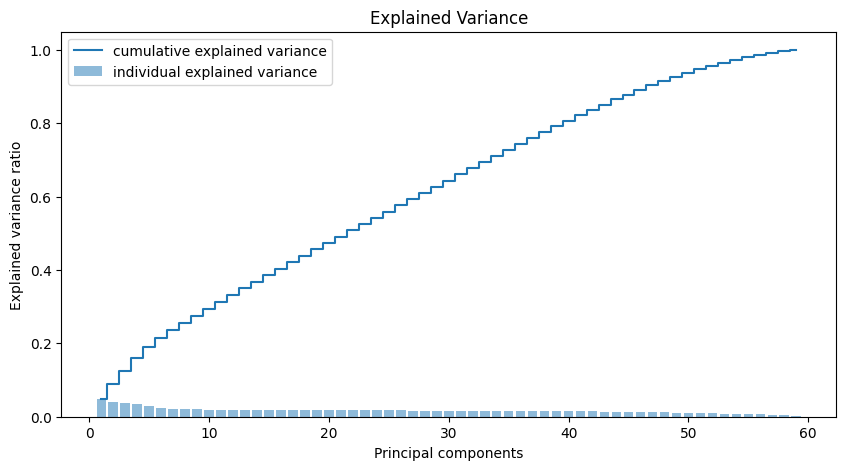

         0         1         2         3         4         5         6   \
0  0.002314  0.000273 -0.006808 -0.002949  0.006066  0.005693  0.001118   
1 -0.004693 -0.000985 -0.007076 -0.000238  0.000585  0.007402  0.002906   
2  0.001029  0.000267 -0.007258 -0.003262  0.003006  0.004524 -0.001229   
3 -0.000756  0.001409 -0.010375 -0.004770  0.004384  0.000676  0.000399   
4 -0.000965  0.001617 -0.001180  0.004727 -0.001397  0.006442 -0.001724   

         7         8         9         10        11        12        13  \
0  0.000553 -0.001037  0.001830 -0.000082  0.000682 -0.000008  0.001000   
1  0.002295  0.005465 -0.002732 -0.008740 -0.002666 -0.001372 -0.001779   
2 -0.000093 -0.001513  0.000279  0.001122 -0.002346 -0.000360  0.001290   
3  0.000179 -0.001715 -0.006294 -0.004516 -0.006680 -0.002305 -0.000175   
4 -0.000301 -0.001844  0.000335  0.001537 -0.003164 -0.000016  0.001471   

         14        15        16        17        18        19        20  \
0  0.000248 -0.001213 -

In [96]:
pca = PCA_Manual(n_components=40)
pca_data = pca.fit_transform(data_scaled)
pca.plot_explained_variance()
print(pca_data[:5])

## Modeling with PCA

### Logistic Regression

In [97]:
pca_data['readmitted']=Copy_df['readmitted']

In [98]:
# Assuming pca_data is your PCA-transformed data (NumPy array)
# y_pca is your target variable array (NumPy array)
y_pca=pca_data['readmitted']

# Split the PCA-transformed data and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_data, y_pca, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
log_reg_pca = LogisticRegression(
    learning_rate=0.01,
    epsilon=1e-10,
    max_iteration=1000,
    Copy_df=pca_data,  # No DataFrame is being passed here
    target_column='readmitted',  # No target column as pca_data doesn't have column names
)


# Fit the model
# log_reg_model.fit()

# You can add additional code to test and evaluate the model using X_test and y_test


In [99]:
log_reg_pca = LogisticRegression(learning_rate=0.000001, epsilon=0.001, max_iteration=1000, Copy_df=pca_data, target_column='readmitted')
log_reg_pca.fit()
log_reg_pca_df = log_reg_pca.export_costs_to_dataframe()
print(log_reg_pca_df)

 29%|██▉       | 291/1000 [00:01<00:04, 152.51it/s]


model stopped learning
[ 0.27684299  0.00383593 -0.02682758  0.0591885  -0.07741917 -0.26640856
 -0.00692404 -0.90801923  0.05706174 -0.15596005  0.16447214  0.08321411
 -0.38370327 -0.09612867 -0.71316936  0.12993482  0.58868928 -0.62128102
  0.01692793  0.28730704 -0.03496802  0.76414458  1.06180616  0.87378992
  1.30088372  1.88867438 -0.60294873  1.08377273 -0.06719894 -0.40897473
  0.63793766  1.51140616  1.59391434  0.73747631  0.73303888  0.61316015
 -0.7794514   0.1971321  -0.7066844  -0.1804166 ]
the training accuracy was 0.5816396639996454
the training recall was 0.521594684385382
the training precision was 0.11533214398153006
the training f1_score was 0.18889652801650053
     Iteration      Cost
0            0  1.686928
1            1  1.681752
2            2  1.676585
3            3  1.671428
4            4  1.666279
..         ...       ...
287        287  0.781425
288        288  0.780399
289        289  0.779383
290        290  0.778376
291        291  0.777379

[292 row

### Neural Network

In [ ]:
# # Assuming pca_data is your PCA-transformed data and y is your target variable
# X_pca = pca_data  # Your PCA-transformed data
# y = pca_data['readmitted']  # Your target variable

# # Split the PCA data into training and testing sets
# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# # Number of principal components
# n_components = X_train_pca.shape[1]

# # Build the model
# model = Sequential()
# model.add(Dense(64, input_dim=n_components, activation='tanh'))  # Adjust input dimensions
# model.add(Dense(32, activation='sigmoid'))
# model.add(Dense(16, activation='sigmoid'))
# model.add(Dense(8, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))  # For binary classification

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test_pca, y_test)
# print('Test Accuracy:', accuracy)


In [101]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

def train_evaluate_nn_pca(pca_data, target_column, epochs=10, batch_size=32):
    # Extract features and target
    X_pca = pca_data
    y = pca_data[target_column]

    # Split the PCA-transformed data into training and testing sets
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

    # Number of principal components
    n_components = X_train_pca.shape[1]

    # Build the model
    model = Sequential()
    model.add(Dense(64, input_dim=n_components, activation='tanh'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_pca, y_test)
    print('Test Accuracy:', accuracy)

    # Extract loss values
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    # Create a DataFrame for loss values
    nn_loss_df = pd.DataFrame({'epoch': range(1, epochs + 1), 'loss': loss_values, 'val_loss': val_loss_values})

    return model, accuracy, nn_loss_df

# Usage Example
# Assuming 'pca_data' is your PCA-transformed DataFrame and 'readmitted' is the target column
nn_model_pca, nn_accuracy_pca, nn_pca_loss_df = train_evaluate_nn_pca(pca_data, 'readmitted')
print(nn_pca_loss_df)


Epoch 1/10
1269/1269 [==============================] - 8s 4ms/step - loss: 0.3548 - accuracy: 0.8745 - val_loss: 0.2980 - val_accuracy: 0.9120
Epoch 2/10
1269/1269 [==============================] - 5s 4ms/step - loss: 0.3102 - accuracy: 0.9067 - val_loss: 0.2980 - val_accuracy: 0.9120
Epoch 3/10
1269/1269 [==============================] - 6s 5ms/step - loss: 0.3102 - accuracy: 0.9067 - val_loss: 0.2981 - val_accuracy: 0.9120
Epoch 4/10
1269/1269 [==============================] - 5s 4ms/step - loss: 0.3102 - accuracy: 0.9067 - val_loss: 0.2981 - val_accuracy: 0.9120
Epoch 5/10
1269/1269 [==============================] - 6s 5ms/step - loss: 0.3102 - accuracy: 0.9067 - val_loss: 0.2979 - val_accuracy: 0.9120
Epoch 6/10
1269/1269 [==============================] - 5s 4ms/step - loss: 0.3101 - accuracy: 0.9067 - val_loss: 0.2979 - val_accuracy: 0.9120
Epoch 7/10
1269/1269 [==============================] - 5s 4ms/step - loss: 0.3101 - accuracy: 0.9067 - val_loss: 0.2983 - val_accuracy:

### K-Nearest Neighbors (KNN)

In [ ]:
# def knn_classifier(X, y, k=3, test_size=0.2):
#     # Split the data into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#     # Efficient distance calculation
#     def predict(x):
#         distances = np.linalg.norm(X_train - x, axis=1)
#         k_indices = np.argsort(distances)[:k]
#         k_nearest_labels = y_train[k_indices]
#         return np.bincount(k_nearest_labels).argmax()

#     # Predict for each test instance
#     predictions = np.array([predict(x) for x in X_test])

#     # Calculate accuracy
#     accuracy = np.mean(predictions == y_test)
#     return accuracy, predictions

# # Assuming pca_data is your PCA-transformed DataFrame and 'readmitted' is the target column
# X_pca = pca_data.drop('readmitted', axis=1).values
# y_pca = pca_data['readmitted'].values

# # Run KNN classifier on PCA-transformed data
# accuracy, predictions = knn_classifier(X_pca, y_pca, k=3)
# print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def knn_classifier_after_pca(pca_data, target_column, k=3, test_size=0.2):
    # Extract features and target from PCA-transformed data
    X_pca = pca_data.drop(target_column, axis=1).values
    y_pca = pca_data[target_column].values

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=test_size, random_state=42)

    # Efficient distance calculation
    def predict(x):
        distances = np.linalg.norm(X_train - x, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

    # Predict for each test instance
    predictions = np.array([predict(x) for x in X_test])

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)
    return accuracy, predictions

# Initialize an empty DataFrame to store metrics
knn_pca_performance_metrics = pd.DataFrame(columns=["K_Value", "Accuracy"])

# Running the classifier with different k values
for k in range(1, 6):  # Example: trying k from 1 to 5
    accuracy, _ = knn_classifier(Copy_df, 'readmitted', k=k)
    print(f"Accuracy with k={k}: {accuracy}")

    # Appending the results to the DataFrame
    knn_pca_performance_metrics = knn_pca_performance_metrics.append({"K_Value": k, "Accuracy": accuracy}, ignore_index=True)

# Now performance_metrics DataFrame contains the accuracy for each k value
print(knn_pca_performance_metrics)


Accuracy after PCA: 0.8927582689785808


**Cost function analysis**

Before PCA

After PCA on Logistic Regression